<h1>机器学习-集成学习-房价预测  </h1>
<h2>项目背景</h2>
<p >房价预测是房地产市场的一个重要问题，其预测准确率直接影响到房地产市场的盈利能力。本项目基于房价预测数据集，使用机器学习算法进行房价预测，并对比不同算法的预测效果。</p>
<h2>项目任务</h2>
<p>本实验遵从数据挖掘的一般流程，首先对已经下载本地的数据进行读取，常规的探索后，进行数据预处理，随后直接选择sklearn模块中的决策树、随机森林、GDBT、XGBoost算法进行建模，选择出性能突出的模型做进一步的调参优化，最终确认模型，进行预测。</p>
<p>具体任务如下：</p>
<ul>    
    <li>数据预处理：对原始数据进行清洗、处理、转换等操作，使得数据集更加适合机器学习算法的使用。</li>
    <li>特征工程：根据数据集的特点，选择合适的特征进行建模，提高模型的预测效果。</li>
    <li>模型选择：选择合适的机器学习算法进行建模，并通过交叉验证的方式选择最优的模型。</li>        
    <li>模型训练：使用训练集对模型进行训练，并使用测试集对模型的预测效果进行评估。</li>    
    <li>模型评估：对模型的预测效果进行评估，并分析模型的优劣。</li>    
    <li>模型调优：根据模型的预测效果和实际情况，对模型进行调优，提高模型的预测效果。</li>    
</ul>        
<h2>数据集简介</h2>
<p>数据集来源：本地离线数据集，文件名：kc_house_data.csv</p><a href="https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv">数据详情可查阅此网址</a>
<p>数据集描述：房价预测数据集，包含21个特征，其中包括19个连续特征和2个离散特征。</p>



<h2>数据准备</h2>
<p>首先，查看文件头信息，了解基本的数据记录，查看每条记录具体包含哪些内容。</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

In [2]:
df = pd.read_csv("kc_house_data.csv")
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [3]:
print(df.sample(5))

               id             date     price  bedrooms  bathrooms  \
15580  3959400345  20150311T000000  589500.0         4       1.50   
13335  6187700175  20141223T000000  440000.0         3       1.75   
1050   2771101200  20140517T000000  410000.0         3       2.00   
18733  7663700401  20141220T000000  229000.0         4       1.50   
534    1521069070  20150218T000000  204000.0         3       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15580         3520      4933     1.5           0     0  ...      8   
13335         1640      8529     1.0           0     0  ...      7   
1050          1700      4250     1.0           0     0  ...      6   
18733         1820     22814     1.5           0     0  ...      7   
534           1040      7405     1.0           0     0  ...      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15580        2270           1250      1929             0    98108  47.5655   
13335   

<p>可以看到，数据集包含21个特征，其中包括19个连续特征和2个离散特征。</p>
<p>接下来，对数据进行探索，查看数据集的基本信息，包括数据量、数据类型、缺失值、异常值等。</p>

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<p>可以看到，数据集中有19个连续特征和2个离散特征，其中有1个id和1个date特征，共有21613条记录。</p>


In [5]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

<p>可以看到，数据集中有1个id和1个date特征，共有21613条记录，数据类型均为数值型。</p>
<p>接下来，对数据进行属性空值检测，查看是否有缺失值。</p>

In [6]:
print(df.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


<p>可以看到，数据集中没有缺失值。</p>
<p>接下来，查看每种属性与房价的分布关系，并通过散点图进行可视化。</p>

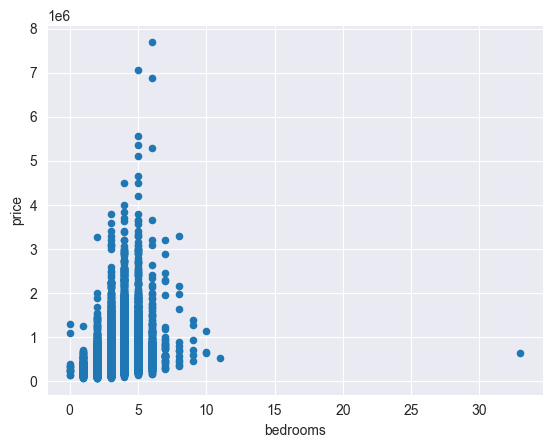

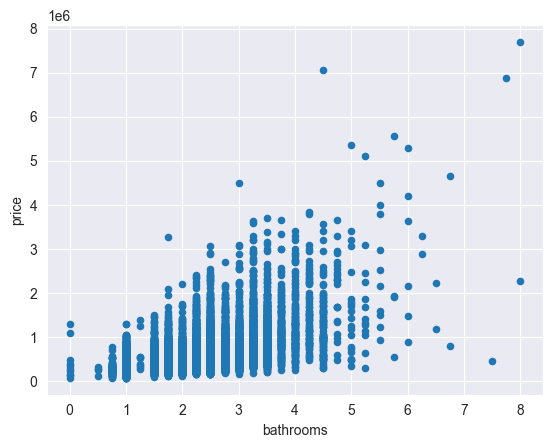

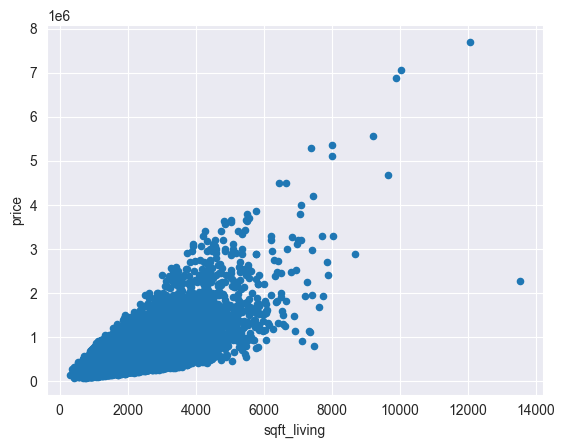

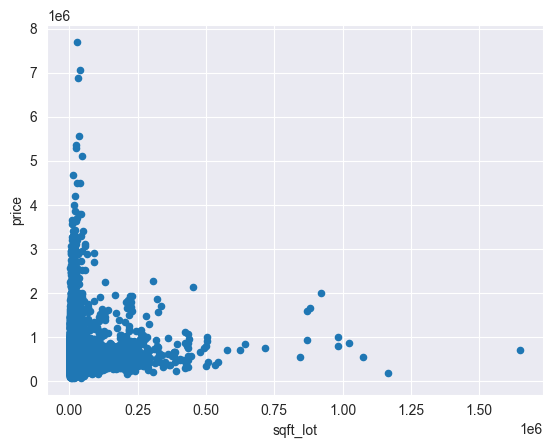

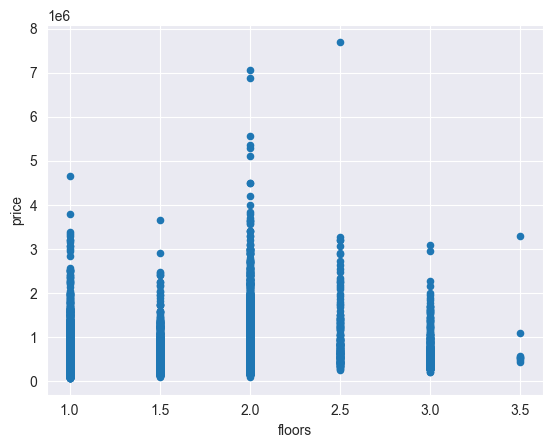

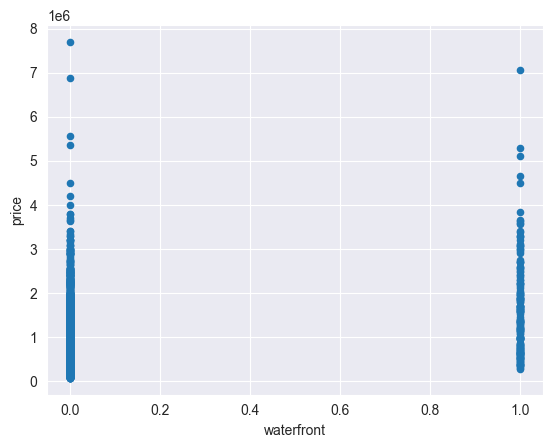

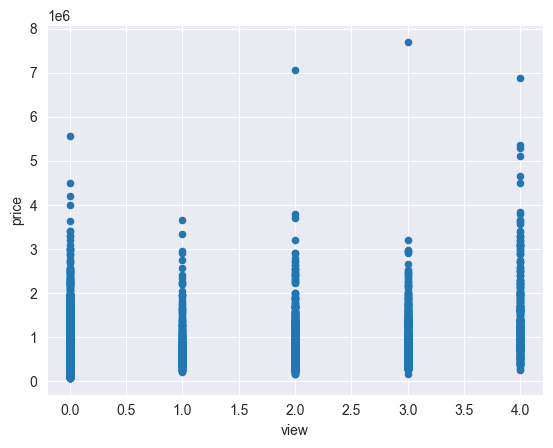

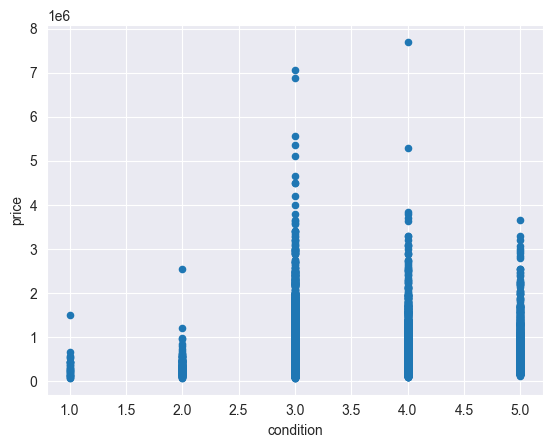

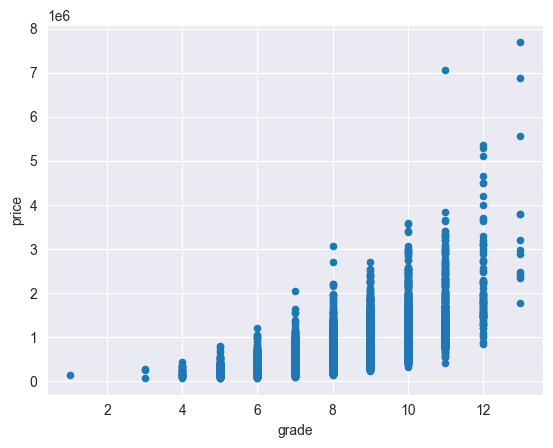

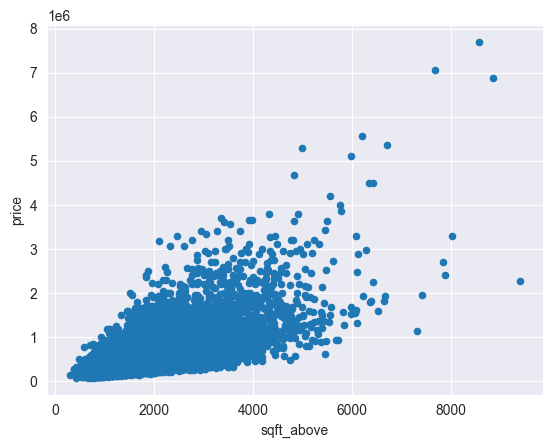

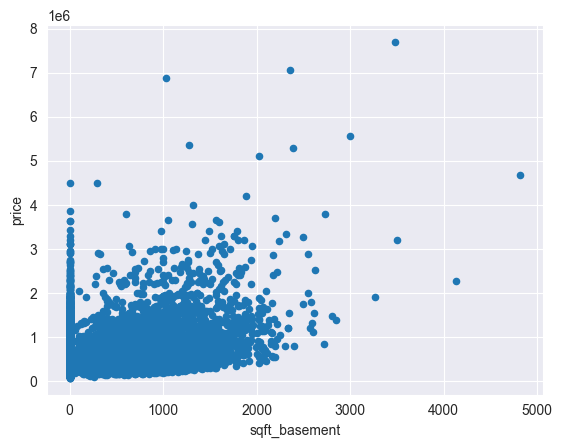

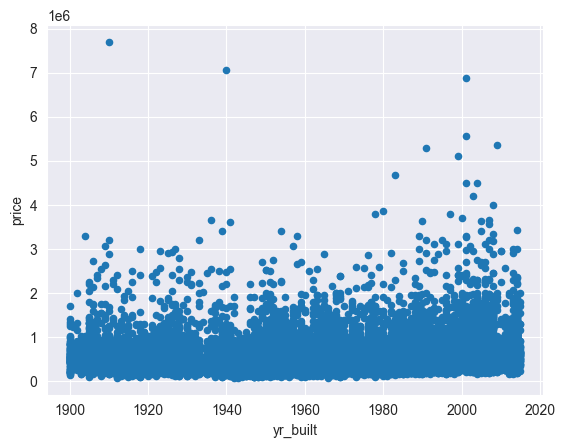

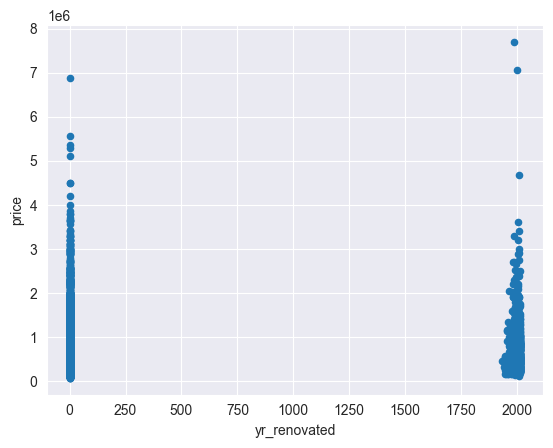

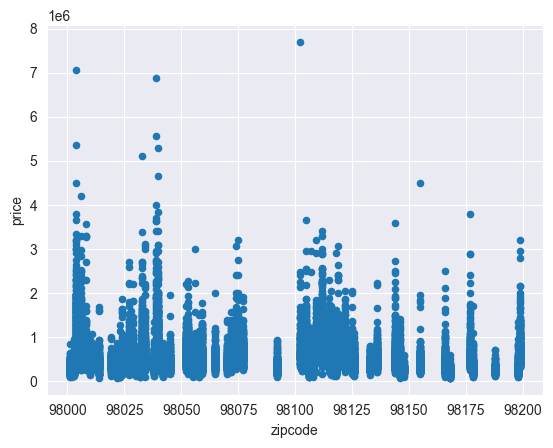

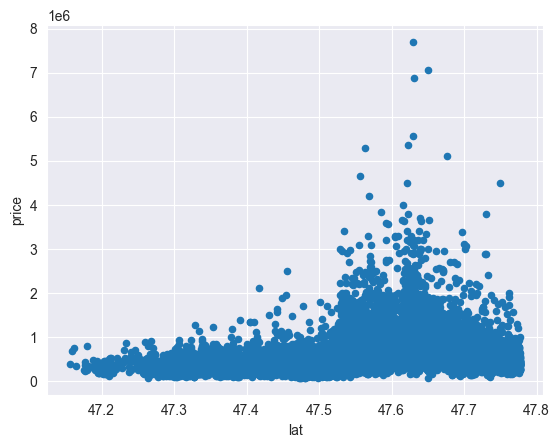

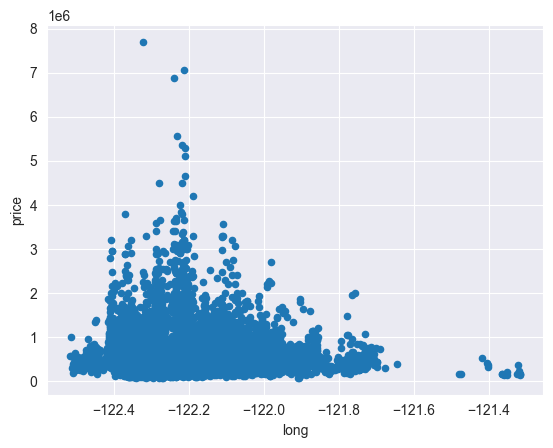

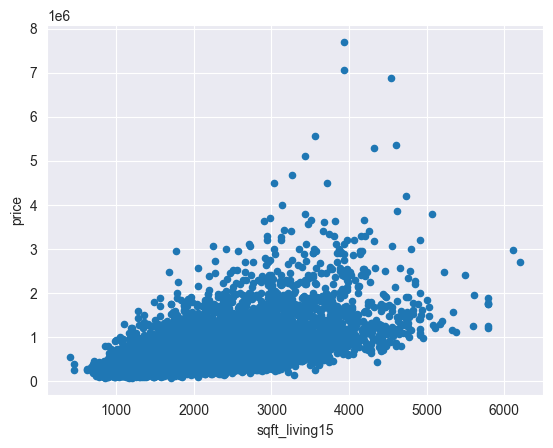

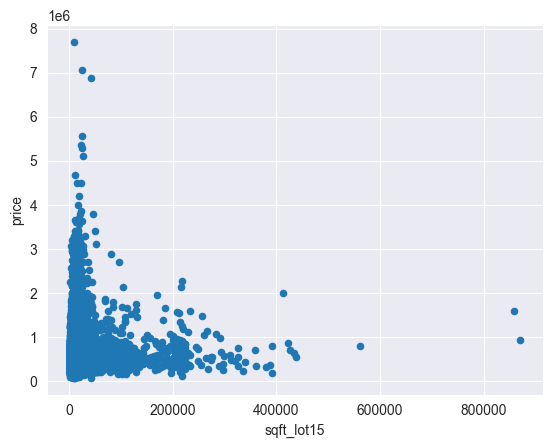

In [7]:
x_vars=df.columns[3:]
for x_var in x_vars:
   df.plot(kind='scatter',x=x_var,y='price')

<p>可以看到，数据集中有些特征与房价的关系不明显，如sqft_living15、sqft_lot15、lat、long等。</p>
<p>接下来，通过热力图对数据集的相关性进行可视化。</p>

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

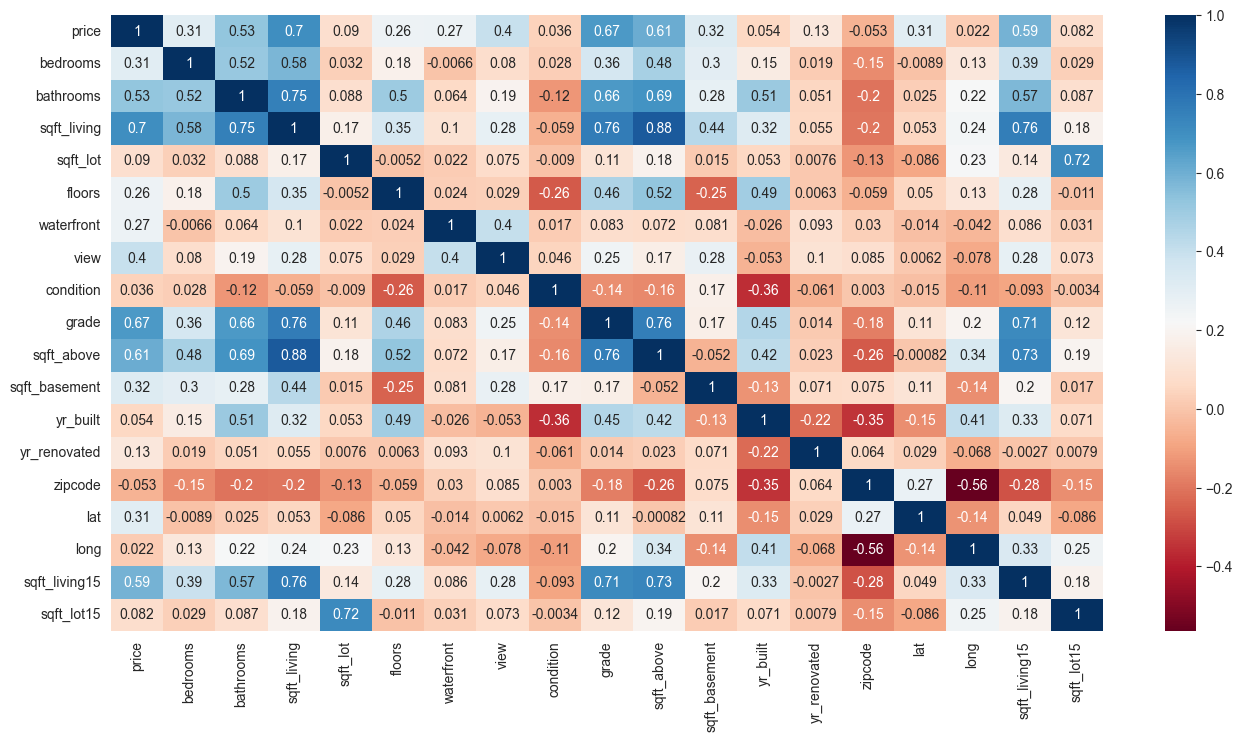

In [8]:
df.drop(["id","date"],axis=1,inplace=True)

corr = df.corr()
print(corr)
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,cmap="RdBu")    
plt.show()


<p>可以看到，数据集中有些特征与房价的相关性较高，如sqft_living、sqft_above、sqft_basement、yr_built、yr_renovated等。</p>
<p>进一步对数据进行简化处理，删除重复特征。</p>

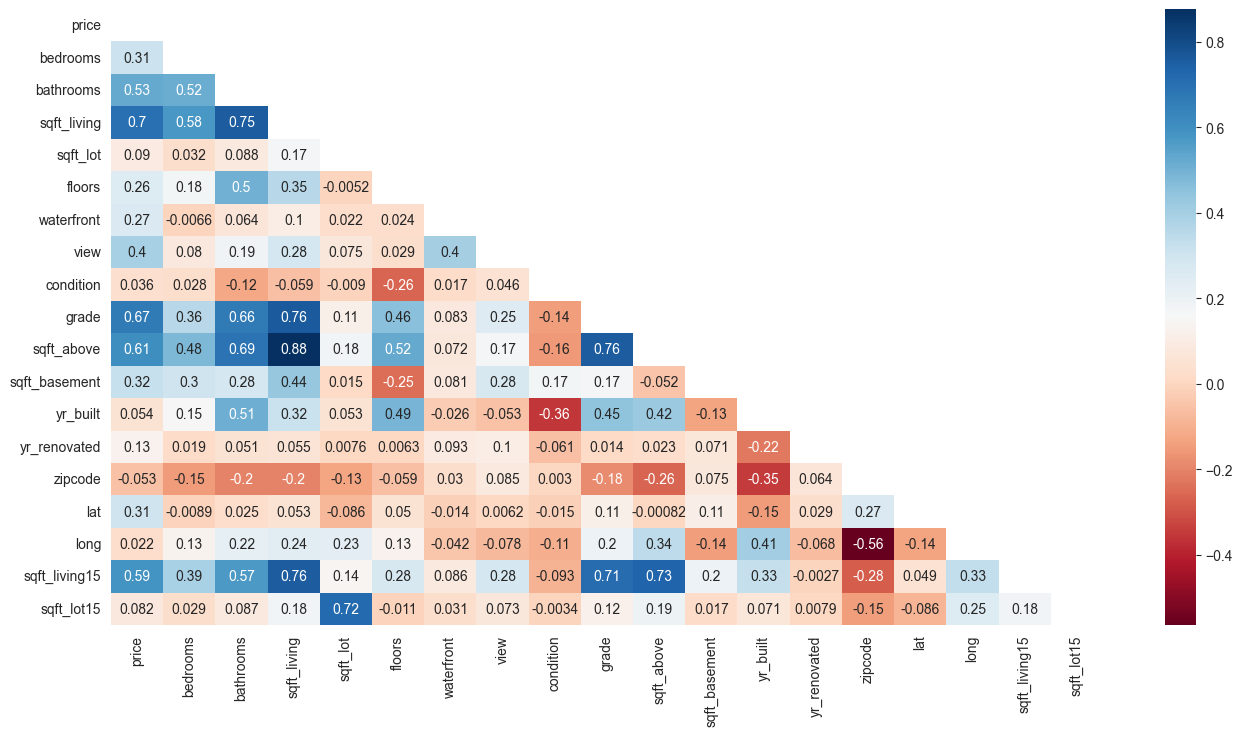

In [9]:
plt.figure(figsize=(16,8))
mask = np.zeros_like(corr,dtype=np.bool_)#np.bool_ is a boolean type
# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
sns.heatmap(corr,annot=True,cmap="RdBu",mask=mask)
plt.show ()


<p>将其中相关性小于0.5的特征删除，使得数据集更加简洁，可视化更加清晰。</p>

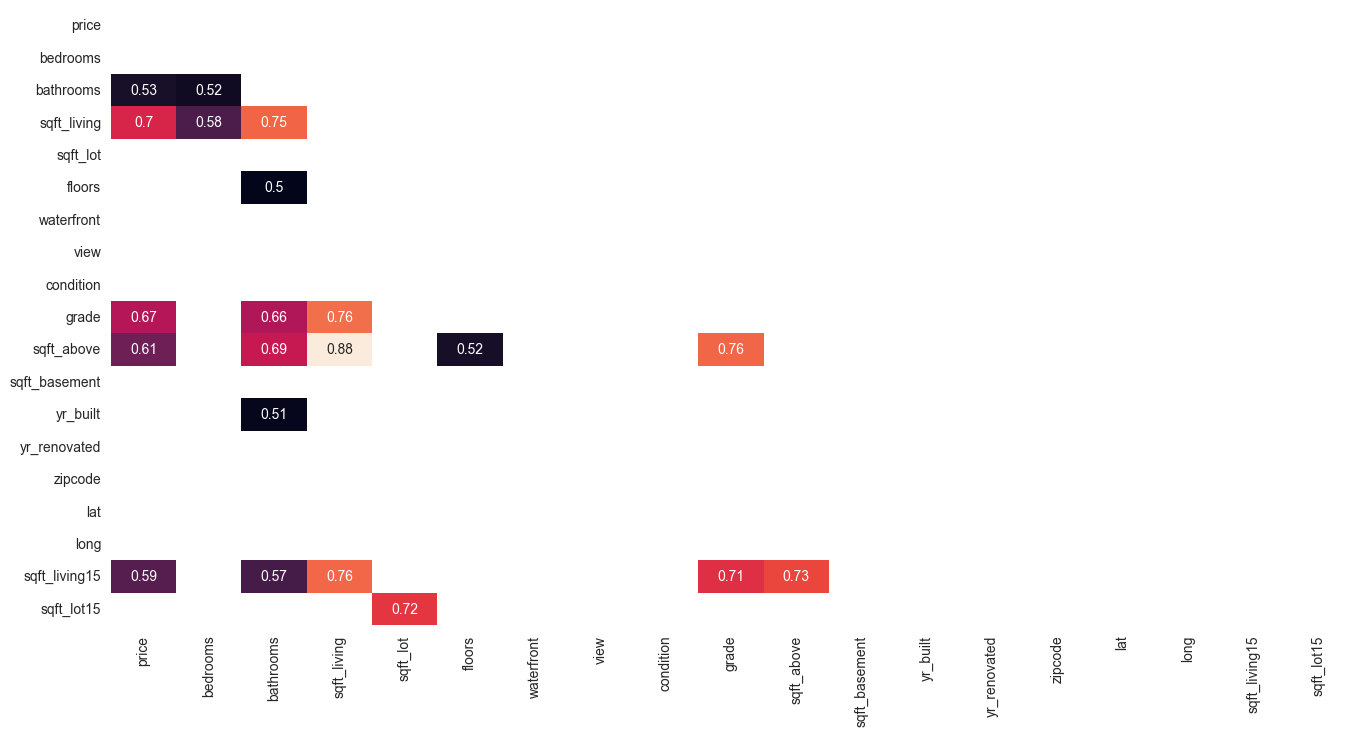

In [10]:
plt.figure(figsize=(16,8))
mask = np.zeros_like(corr[corr>=.5],dtype=np.bool_)
# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
sns.heatmap(corr[corr>=.5],annot=True,mask=mask,cbar=False)
plt.show()


<p>查看所有房子的地理分布的散点图，查看房屋的地理分布是否存在相关的分布规律。</p>

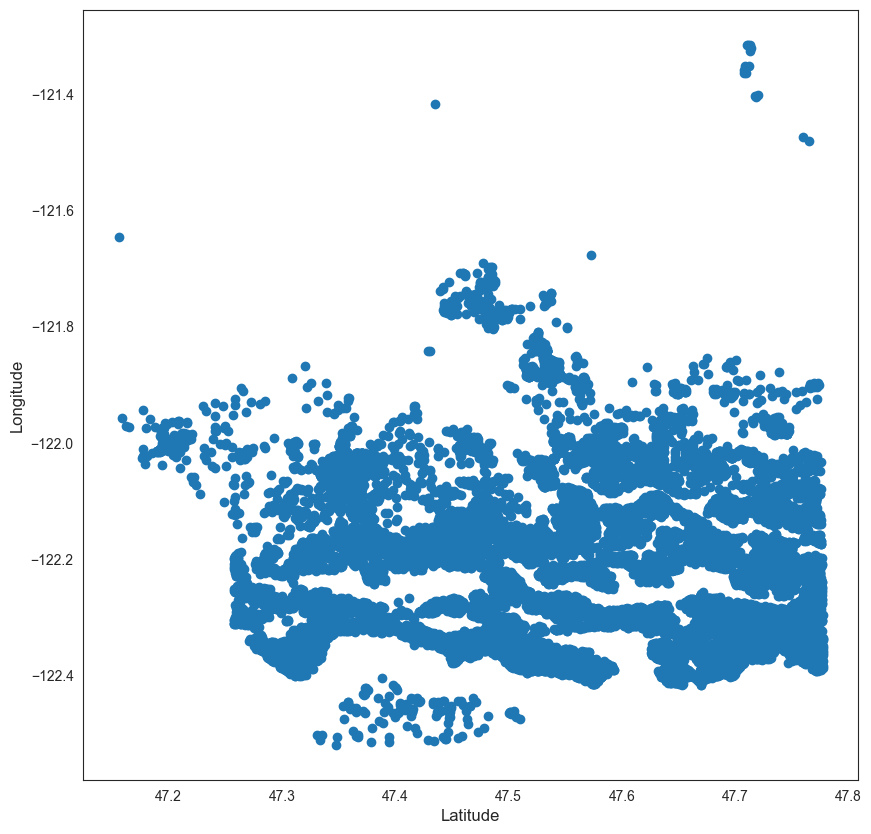

In [11]:
plt.figure(figsize=(10,10))
#调用散点图模块，依据经纬度绘制散点图
plt.scatter(df.lat, df.long)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()


<p>可以看到，数据集中房屋的地理分布存在相关的分布规律，房屋的分布呈现出聚集的形状。</p>
<p>接下来，分析邮编与房价的分布关系</p>

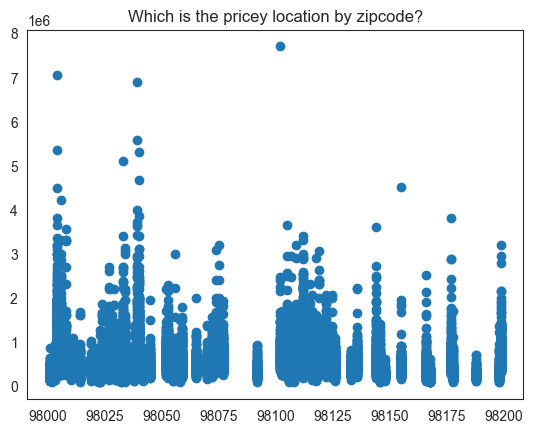

In [12]:
plt.scatter(df.zipcode,df.price)
plt.title("Which is the pricey location by zipcode?")
plt.show()

<p>可以看到，数据集中房屋的价格与邮编的分布存在相关性，邮编与房价呈现出正相关关系。</p>
<p>从图中可以看出，部分地区的房价跨度较大，有些地区房价比较便宜，因此邮编也是影响房价重要的因素。价格普遍集中在100~200万附近，且100万左右占大多数，表明价格数据分布存在倾斜的情况，高价格房屋的价格赞比较少。但实际规律无法直观体现，需要采用数据挖掘算法进行建模分析。</p>


<h2>模型建模</h2>
<p>本项目使用机器学习算法进行房价预测，选择的算法有决策树、随机森林、GDBT、XGBoost、Lasso、Ridge、ElasticNet、GBDT。</p>
<p>首先，配置训练数据和测试数据。</p>

In [13]:
from sklearn.linear_model import LinearRegression

X = df[['bedrooms', 'bathrooms', 'sqft_living',\
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',\
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',\
       'lat', 'long', 'sqft_living15', 'sqft_lot15']] .values
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


<p>接下来，对数据进行标准化处理。</p>

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)


<h3>采用线性回归建立回归模型</h3>

In [15]:
# 线性回归
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#let us predict
y_pred=model.predict(X_test)
print (model.score(X_test, y_test ))


0.7099895918695944


<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>

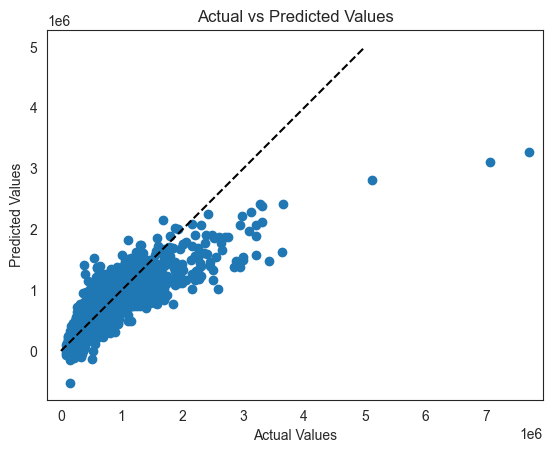

In [16]:
plt.scatter(y_test, y_pred) 
plt.plot([0, 5000000], [0, 5000000], '--k')        #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()  

<p>可以看到，线性回归模型的预测效果较差，拟合效果不佳。</p>
<h3>采用lasso回归建立回归模型</h3>

In [17]:
# lasso回归
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 设置alpha参数的候选值
param_grid = {'alpha': [ 0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter=10000)

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳的alpha值
print(grid_search.best_params_)#输出最佳的alpha值


# 使用最佳的alpha值进行Lasso回归
best_lasso = grid_search.best_estimator_#使用最佳的alpha值进行Lasso回归
best_lasso.fit(X_train, y_train)
y_pred = best_lasso.predict(X_test)#预测值
print (best_lasso.score(X_test, y_test))


D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+13, tolerance: 1.639e+11
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.952e+13, tolerance: 1.582e+11
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.49

{'alpha': 100}
0.7096652177094578


<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>

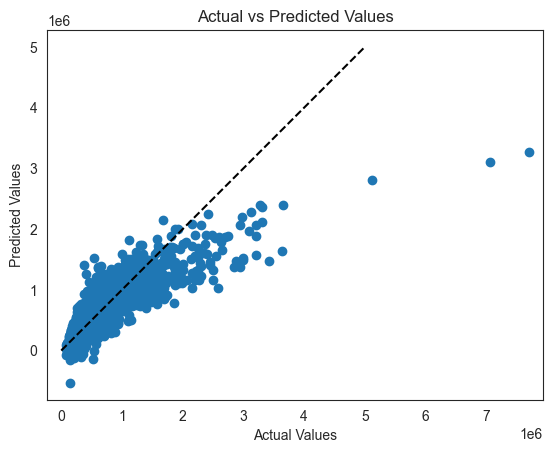

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([0, 5000000], [0, 5000000], '--k')  #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<p>可以看到，lasso回归模型的预测效果较差，拟合效果不佳。</p>
<h3>采用岭回归建立回归模型</h3>

In [19]:
# 岭回归
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
    
# 设置alpha参数的候选值
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳的alpha值
print(grid_search.best_params_)#输出最佳的alpha值
best_ridge = grid_search.best_estimator_#使用最佳的alpha值进行岭回归
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_test)#预测值
print (best_ridge.score(X_test, y_test))

{'alpha': 100}
0.7095544805581173



<h3>采用弹性网络回归建立回归模型</h3>

In [20]:
# 弹性网络回归
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# 定义参数的候选值
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}  # 定义alpha和l1_ratio的候选值

elastic_net = ElasticNet()  # 创建ElasticNet模型

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳的参数
print(grid_search.best_params_)

# 使用最佳的参数进行弹性网络回归
best_elastic_net = grid_search.best_estimator_
best_elastic_net.fit(X_train, y_train)
y_pred = best_elastic_net.predict(X_test)  # 使用最佳模型进行预测
print (best_elastic_net.score(X_test, y_test))




D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e+14, tolerance: 1.639e+11
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+14, tolerance: 1.582e+11
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.44

{'alpha': 0.01, 'l1_ratio': 0.5}
0.7096093814267335


D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.654e+14, tolerance: 2.019e+11
  model = cd_fast.enet_coordinate_descent(


<h3>采用随机森林回归建立回归模型</h3>

In [21]:
# 随机森林回归
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))


0.878415556550445


<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>

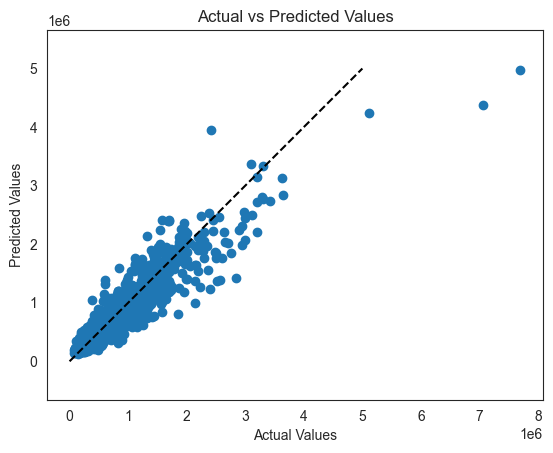

In [22]:
# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.plot([0, 5000000], [0, 5000000], '--k')  #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<p>可以看到，随机森林回归模型的预测效果较差，拟合效果不佳。</p>
<h3>采用GBDT回归建立回归模型</h3>

In [23]:
# 集成学习回归，梯度提升回归
#GBDT算法
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))


0.8857002226570005


<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>

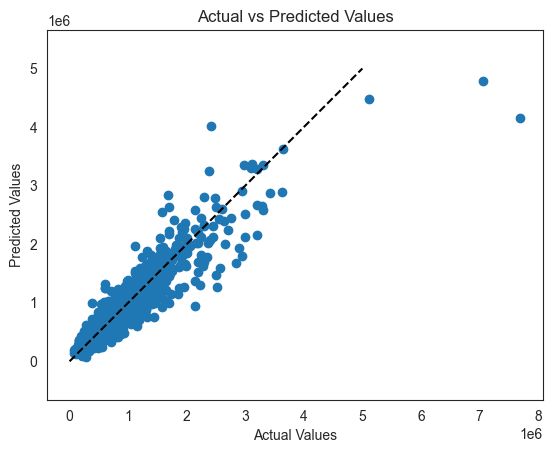

In [24]:
# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.plot([0, 5000000], [0, 5000000], '--k')  #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<h3>采用k邻近回归建立回归模型</h3>

In [25]:
# K近邻回归（KNN回归）
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))


0.7915930246953061


<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>

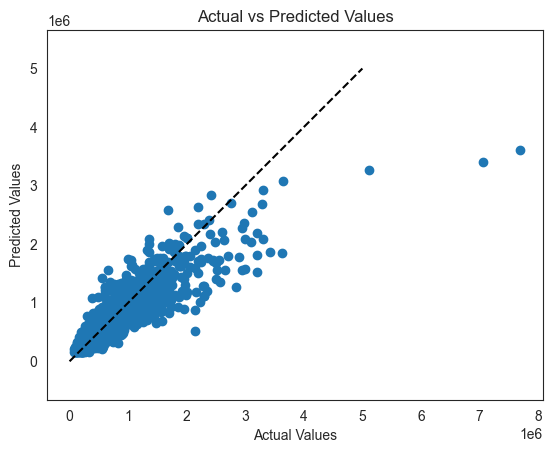

In [26]:
# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.plot([0, 5000000], [0, 5000000], '--k')  #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<h3>采用决策树回归建立回归模型</h3>

In [27]:
# 决策树回归
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))


0.7339141247881598


       
<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>

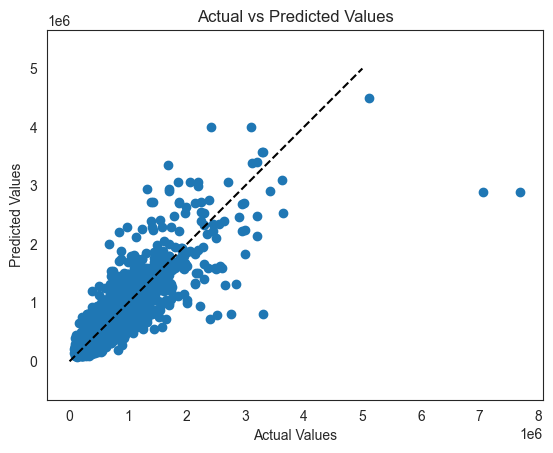

In [28]:
# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.plot([0, 5000000], [0, 5000000], '--k')  #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

       
<h3>采用梯度提升回归建立回归模型</h3>

In [29]:
# 梯度提升
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test,y_predicted))  #均方误差
print(mean_squared_error(y_test,y_predicted))  #均方根误差
print(r2_score(y_test,y_predicted))   #R方值  

67502.1134690512
15327696146.751202
0.8888761133359506


       
<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p> 

0.8888761133359506


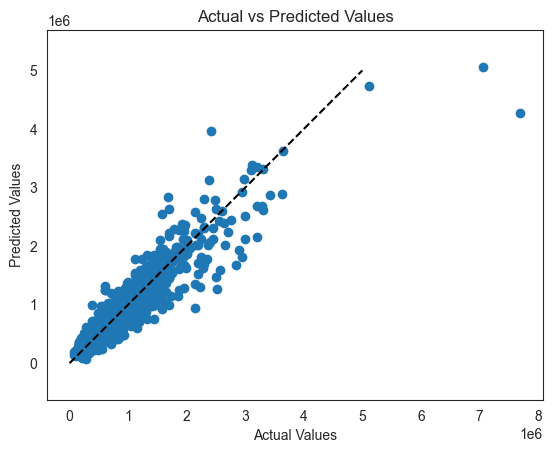

In [30]:
# 绘制预测值与实际值的散点图
print(r2_score(y_test,y_predicted))   #R方值  
plt.scatter(y_test, y_predicted)
plt.plot([0, 5000000], [0, 5000000], '--k')        #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


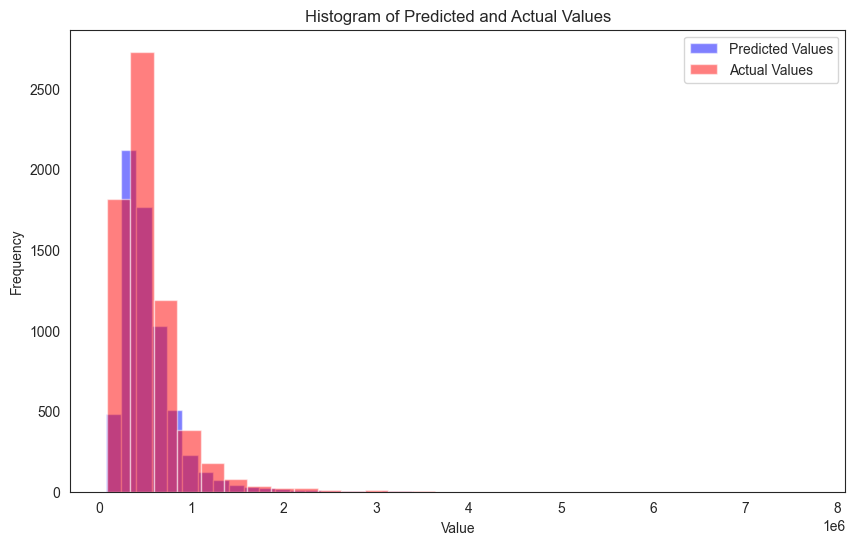

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(y_predicted, bins=30, alpha=0.5, color='b', label='Predicted Values')
plt.hist(y_test, bins=30, alpha=0.5, color='r', label='Actual Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Actual Values')
plt.legend()#显示图例
plt.show()#显示图形


<p>可以看到，GBDT回归模型的预测效果较好，拟合效果较好。</p>
<h2>模型调参</h2>
<p>本项目使用网格搜索法对模型进行调参，选择的模型为GBDT。</p>    

In [32]:
# 网格搜索
model_gbr = GradientBoostingRegressor()
#from sklearn.grid_search import GridSearchCV 这个问题似乎是因为你尝试使用一个已经不再被sklearn库支持的方法。在sklearn库中，GridSearchCV 类已经从 sklearn.grid_search 移动到了 sklearn.model_selection 模块。

from sklearn.model_selection import GridSearchCV
parameters = {'loss': ['ls','lad','huber','quantile'],'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],'alpha': [0.5,0.6,0.7,0.8,0.9]}
model_gs = GridSearchCV(estimator=model_gbr, param_grid=parameters, cv=5)
model_gs.fit(X,y)
print('Best score is:', model_gs.best_score_)
print('Best parameter is:', model_gs.best_params_)


D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\envs\pytorch-gpu\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\envs\p

Best score is: 0.8464016504273637
Best parameter is: {'alpha': 0.9, 'loss': 'huber', 'min_samples_leaf': 7}


       
<p>可以看到，GBDT模型的最佳参数为loss='huber',min_samples_leaf=7,alpha=0.9。</p>
<h2>模型评估</h2>       

In [33]:
# 最优模型
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=10000,alpha=0.9,loss='huber',min_samples_leaf=7)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(model.score(X_test, y_test))  #模型得分
print(mean_absolute_error(y_test,y_pred))#均方误差
print(mean_squared_error(y_test,y_pred)) #均方根误差



0.8856815399063152
65804.00861031901
15768334539.790592


       
<p>可以看到，GBDT模型的得分较高，均方误差较低。</p>
<p>绘制预测值与实际值的散点图，查看模型的预测效果。</p>   

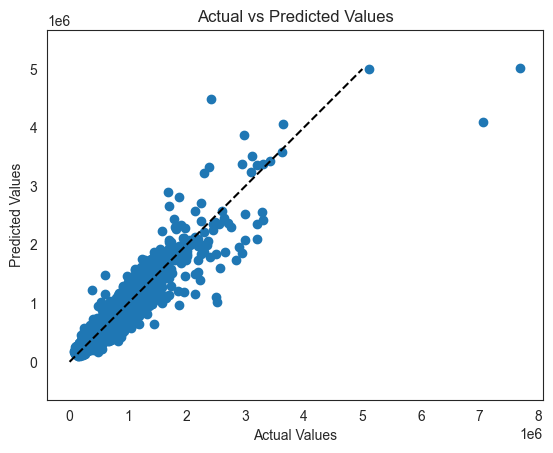

In [34]:
# 绘制预测值与实际值的散点图
plt.scatter(y_test, y_pred)
plt.plot([0, 5000000], [0, 5000000], '--k')  #绘制一条直线
plt.axis('equal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()